In [1]:
# Import Packages
import numpy as np
import pandas as pd
import textwrap
from datetime import date

/var/folders/3q/g3c2y1vx02l3td8zn4dwmvwc0000gn/T/ipykernel_18662/1174318460.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import dataset
df = pd.read_csv('../data/basic_questions_sample.csv')
#df.head()
#df.shape()
#df.info()
#df.describe()
print(df)

                                             Question Response  Comments
0   Do you have a company wide cyber security policy?      Yes       NaN
1   Do you have any cyber security awareness poste...      Yes       NaN
2   Do you have an internal person and/or external...      Yes       NaN
3   Is cyber security discussed at a management / ...   Unsure       NaN
4              Do you currently have cyber insurance?      Yes       NaN
5   Has your organisation ever experienced a cyber...      Yes       NaN
6   Do you have a formal Information Security (IS)...       No       NaN
7   Do you have a simple process to audit 3rd part...      Yes       NaN
8   Have you identified mission critical informati...       No       NaN
9   Do you have an inventory of all devices / phon...      Yes       NaN
10  Do you have encryption enabled on all devices,...       No       NaN
11  Do you have a formal process when disposing of...      Yes       NaN
12  Do you centralise management and configuration.

In [3]:
# Company and assessment details
company = input()
date = date.today()
print(date)

 Company Example


2024-03-06


In [4]:
# Count the number of True vs False
#df["Response"].value_counts().plot.pie()
df.groupby('Response').size()

Response
No        25
Unsure     1
Yes       28
dtype: int64

In [5]:
# Assigning categories to questions

# Define category names and corresponding row ranges
categories = {
    'Cyber Security Overview': range(0, 5),
    'Information Security': range(6, 9),
    'Device Security': range(10, 12),
    'Network & Wi-Fi Security': range(13, 19),
    'Software & Application Security': range(19, 23),
    'Authentication & Passwords': range(23, 27),
    'Removeable Media': range(27, 29),
    'Email Security': range(29, 33),
    'Internet Use & Browser Security': range(33, 35),
    'Endpoint Protection': range(35, 37),
    'Website Security': range(37, 41),
    'Staff Security Awareness': range(41, 44),
    'Remote Working': range(44, 46),
    'Disaster Recovery': range(46, 49),
    'Incident Response': range(49, 54),
    # Add more categories and corresponding row ranges if needed
}

# Create a new column 'Category' and assign category names based on row index
for category, rows in categories.items():
    df.loc[df.index.isin(rows), 'Category'] = category

# Display the DataFrame to verify the changes
#print(df)

# Count the number of questions for each category
category_counts = df['Category'].value_counts()

# Display the counts
print(category_counts)

Category
Network & Wi-Fi Security           6
Cyber Security Overview            5
Incident Response                  5
Software & Application Security    4
Authentication & Passwords         4
Email Security                     4
Website Security                   4
Information Security               3
Staff Security Awareness           3
Disaster Recovery                  3
Device Security                    2
Removeable Media                   2
Internet Use & Browser Security    2
Endpoint Protection                2
Remote Working                     2
Name: count, dtype: int64


In [6]:
# Group by 'Category' and 'responses', then count the occurrences
summary_table = df.groupby(['Category', 'Response']).size().unstack(fill_value=0)

# Sum the counts of 'Yes', 'No', and 'Unsure' responses
summary_table['Yes_Count'] = summary_table['Yes']
summary_table['No_Count'] = summary_table['No']
summary_table['Unsure_Count'] = summary_table['Unsure']

# Drop the original response columns
summary_table.drop(columns=['Yes', 'No', 'Unsure'], inplace=True)

# Sum the total number of questions for each category
summary_table['Total_Questions'] = summary_table.sum(axis=1)

# Display the summary table
print(summary_table)

Response                         Yes_Count  No_Count  Unsure_Count  \
Category                                                             
Authentication & Passwords               2         2             0   
Cyber Security Overview                  4         0             1   
Device Security                          1         1             0   
Disaster Recovery                        2         1             0   
Email Security                           2         2             0   
Endpoint Protection                      1         1             0   
Incident Response                        2         3             0   
Information Security                     1         2             0   
Internet Use & Browser Security          1         1             0   
Network & Wi-Fi Security                 3         3             0   
Remote Working                           1         1             0   
Removeable Media                         1         1             0   
Software & Applicati

## NIST Categories

In [7]:
# NIST Categories

# Define category names and corresponding row ranges
nist_categories = {
    'Identify': range(0, 5),
    'Protect': range(6, 9),
    'Device Security': range(10, 12),
    'Detect': range(13, 19),
    'Respond': range(19, 23),
    'Recover': range(23, 27),
    'Compliance': range(27, 29),
    # these still need to be updated
}

# Create a new column 'Category' and assign category names based on row index
for nist_category, rows in nist_categories.items():
    df.loc[df.index.isin(rows), 'NIST Category'] = nist_category

# Display the DataFrame to verify the changes
#print(df)

# Count the number of questions for each category
category_counts = df['Category'].value_counts()

# Display the counts
print(category_counts)

Category
Network & Wi-Fi Security           6
Cyber Security Overview            5
Incident Response                  5
Software & Application Security    4
Authentication & Passwords         4
Email Security                     4
Website Security                   4
Information Security               3
Staff Security Awareness           3
Disaster Recovery                  3
Device Security                    2
Removeable Media                   2
Internet Use & Browser Security    2
Endpoint Protection                2
Remote Working                     2
Name: count, dtype: int64


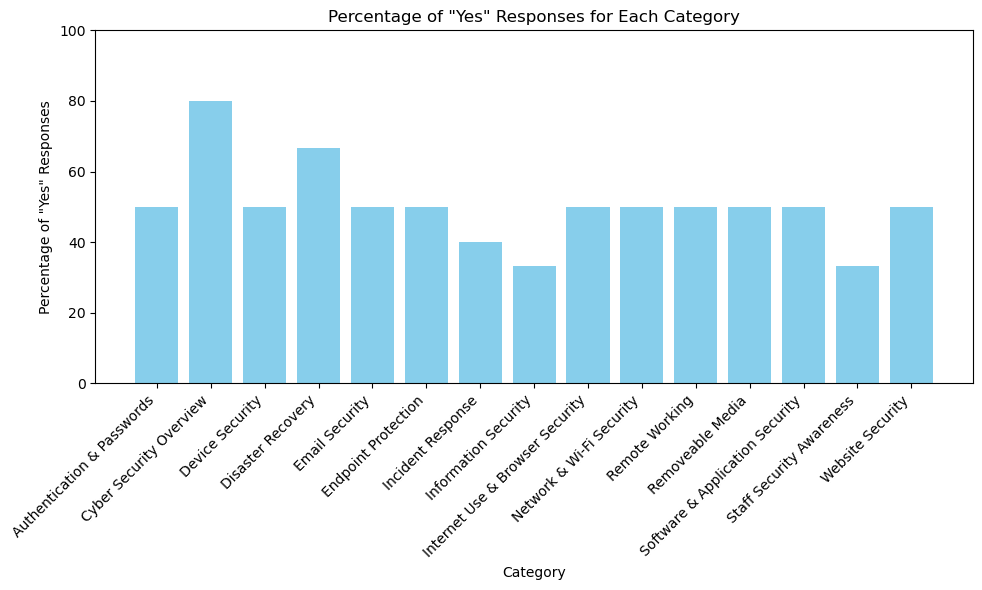

In [8]:
import matplotlib.pyplot as plt

# Calculate the percentage score for each category
summary_table['Percentage_Yes'] = summary_table['Yes_Count'] / summary_table['Total_Questions'] * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(summary_table.index, summary_table['Percentage_Yes'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Percentage of "Yes" Responses')
plt.title('Percentage of "Yes" Responses for Each Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.tight_layout()
plt.show()


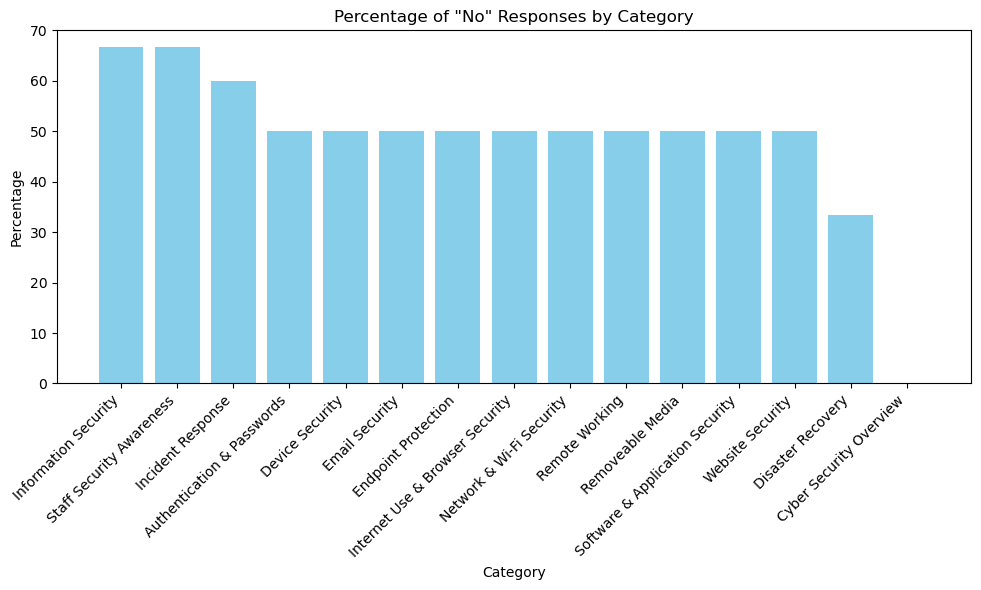

In [9]:
import matplotlib.pyplot as plt

# Calculate the percentage score for each category
summary_table['Percentage'] = (summary_table['No_Count'] / summary_table['Total_Questions']) * 100

# Sort the DataFrame by percentage score
summary_table = summary_table.sort_values(by='Percentage', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(summary_table.index, summary_table['Percentage'], color='skyblue')
plt.title('Percentage of "No" Responses by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


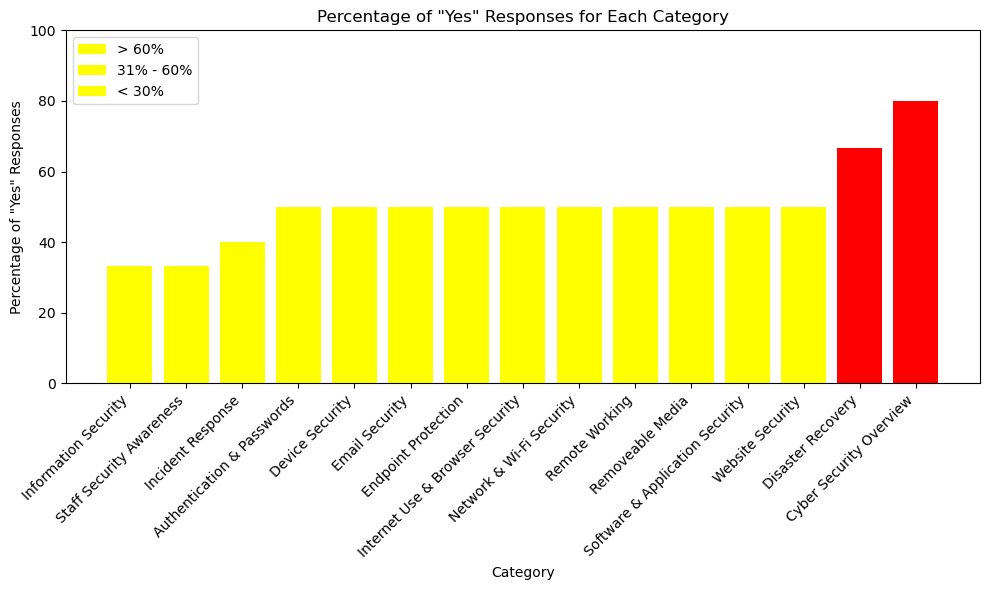

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage score for each category
summary_table['Percentage_Yes'] = summary_table['Yes_Count'] / summary_table['Total_Questions'] * 100

# Define color based on percentage range
colors = np.where(summary_table['Percentage_Yes'] > 60, 'red',
                  np.where((summary_table['Percentage_Yes'] >= 31) & (summary_table['Percentage_Yes'] <= 60), 'yellow', 'green'))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_table.index, summary_table['Percentage_Yes'], color=colors)
plt.xlabel('Category')
plt.ylabel('Percentage of "Yes" Responses')
plt.title('Percentage of "Yes" Responses for Each Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set the y-axis limit to 100%

# Add color legend
plt.legend(handles=[bars[0], bars[1], bars[2]], labels=['> 60%', '31% - 60%', '< 30%'])

plt.tight_layout()
plt.show()


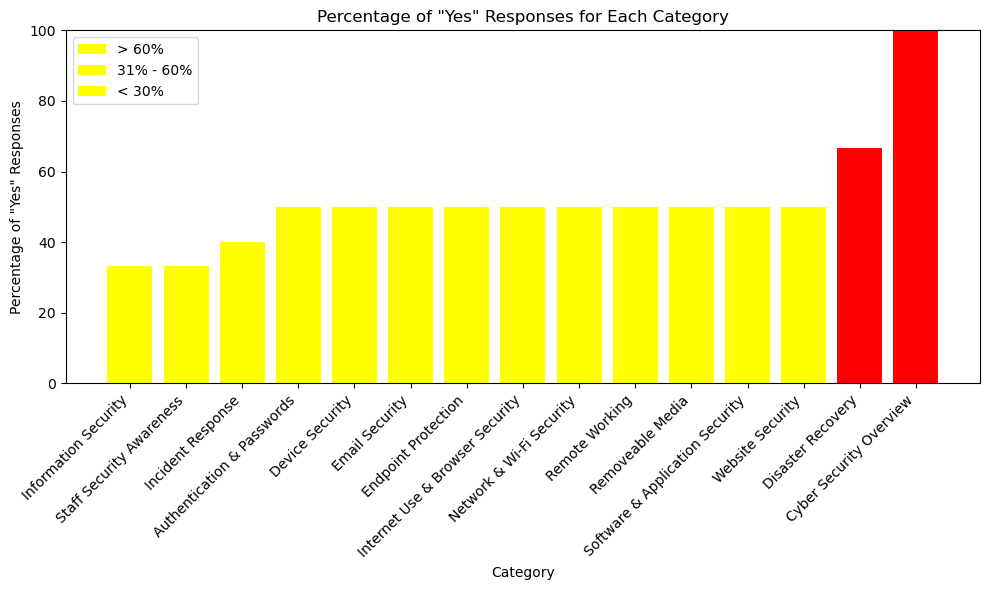

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage score for each category
summary_table['Percentage_No'] = summary_table['No_Count'] / summary_table['Total_Questions'] * 100

# Calculate the percentage score for "Yes" responses
summary_table['Percentage_Yes'] = 100 - summary_table['Percentage_No']

# Define color based on percentage range
colors = np.where(summary_table['Percentage_Yes'] > 60, 'red',
                  np.where((summary_table['Percentage_Yes'] >= 31) & (summary_table['Percentage_Yes'] <= 60), 'yellow', 'green'))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_table.index, summary_table['Percentage_Yes'], color=colors)
plt.xlabel('Category')
plt.ylabel('Percentage of "Yes" Responses')
plt.title('Percentage of "Yes" Responses for Each Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set the y-axis limit to 100%

# Add color legend
plt.legend(handles=[bars[0], bars[1], bars[2]], labels=['> 60%', '31% - 60%', '< 30%'])

plt.tight_layout()
plt.show()


## PDF Generation
The creation of the PDF report to be emailed to the customer

TypeError: object of type 'module' has no len()

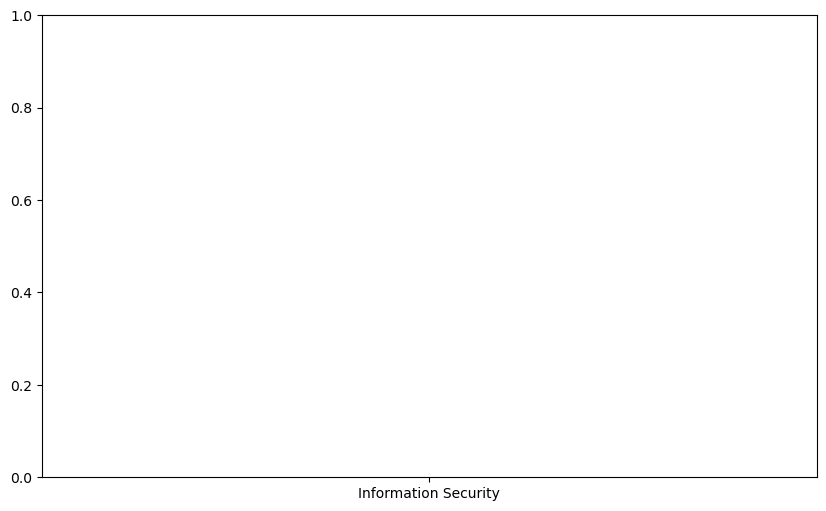

In [15]:
import matplotlib.pyplot as plt
#!pip install reportlab
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle

# Create a PDF document
pdf_filename = "analysis_report.pdf"
pdf = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Define styles for the document
styles = getSampleStyleSheet()
title_style = styles['Title']
subtitle_style = styles['Heading2']
normal_style = styles['Normal']

# Add a title to the document
title_text = "Analysis Report"
pdf_title = Paragraph(title_text, title_style)
pdf.build([pdf_title])

# Add a subtitle for the first chart
subtitle_text = "Percentage of 'Yes' Responses for Each Category"
pdf_subtitle = Paragraph(subtitle_text, subtitle_style)
pdf.build([pdf_subtitle])

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_table.index, summary_table['Percentage_Yes'], color=colors)
plt.xlabel('Category')
plt.ylabel('Percentage of "Yes" Responses')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.tight_layout()

# Save the chart as an image
chart_filename = "yes_responses_chart.png"
plt.savefig(chart_filename)

# Add the chart image to the PDF
pdf_chart = "<img src='" + chart_filename + "'>"
pdf_chart_paragraph = Paragraph(pdf_chart, normal_style)
pdf.build([pdf_chart_paragraph])

# Add recommendations to the PDF
recommendations_text = """
Recommendations:
- Based on the analysis, it is recommended to focus on categories with a high percentage of 'Yes' responses.
- Further investigation is needed for categories with a low percentage of 'Yes' responses to identify potential issues.
"""
recommendations_paragraph = Paragraph(recommendations_text, normal_style)
pdf.build([Spacer(1, 12)])
pdf.build([recommendations_paragraph])

# Close the PDF document
pdf_title_text = "Analysis Report - PDF Generated Successfully!"
pdf_title = Paragraph(pdf_title_text, title_style)
pdf.build([Spacer(1, 36), pdf_title])


---
### Summary: 
Based on your responses, your cyber security maturity and knowledge level is Starter. Your business is in the early stage of its cyber security journey. You need to focus on putting into place some basic measures to have a more effective approach to cyber security.
			
### Key Actions:
- Undertake the recommendations in this report. 
- Redo this survey again in 12 months – to view your maturity level after you take steps to improve your approach to cyber security. Cyber security is constantly evolving and needs to continually address newly emerging threats. Speak to your IT support person/team – about actioning the recommendations in this report.
- Understand what your IT managed service provider is doing about your cyber security – you still need to know what they are doing about reducing cyber threats. While they may support aspects of your cyber security, you are responsible for ensuring they do it properly and your business is secure.
- Speak to your IT managed service provider – about actioning the recommendations in this report.
- GoodresourcestosharewithstaffareprovidedbytheAustralianCyberSecurityCentre [https://www.cyber.gov.au/],who offer guides and reference information for businesses of all sizes. The Small Business Cyber Security Guide [https://www.cyber.gov.au/acsc/view-all-content/publications/small-business-cyber-security-guide] may be particularly helpful. 
				
Each recommendation below lists everything that needs to be actioned in order to reduce your risk of a cyber security threat for this topic. Make sure you review each recommendation in detail to understand which actions you may have already applied and which actions we recommend you still need to apply.

---
